# Data Science Coding Challenge: Loan Default Prediction
#### Coursera Data Science Project

# 1. Importing Required Packages and Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
import pickle as pkl

# 2. Reading Files

In [3]:
data = pd.read_csv('data_descriptions.csv')
submission = pd.read_csv('prediction_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
data

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating t..."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been emp...
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borro..."


In [5]:
submission

,LoanID,predicted_probability
0,7RYZGMKJIR,0.0
1,JDL5RH07AM,0.0
2,STAL716Y79,0.0
3,SO0KKJ3IQB,0.0
4,T99CWTYDCP,0.0
...,...,...
109430,V12FM6UKMS,0.0
109431,GLRB9P0CQO,0.0
109432,RWCJ3SL2J6,0.0
109433,2Z9IZS4OMY,0.0


In [6]:
train_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [7]:
test_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109430,V12FM6UKMS,67,76970,108110,404,67,3,10.51,36,0.18,PhD,Self-employed,Married,Yes,Yes,Auto,No
109431,GLRB9P0CQO,44,108272,238508,335,28,1,9.65,24,0.32,PhD,Full-time,Divorced,Yes,Yes,Education,No
109432,RWCJ3SL2J6,54,73526,18513,576,75,2,17.22,36,0.62,Master's,Part-time,Divorced,No,Yes,Education,No
109433,2Z9IZS4OMY,60,75296,38414,369,71,4,17.69,36,0.66,PhD,Part-time,Married,No,No,Business,Yes


# 3. EDA

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
train_data.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          109435 non-null  object 
 1   Age             109435 non-null  int64  
 2   Income          109435 non-null  int64  
 3   LoanAmount      109435 non-null  int64  
 4   CreditScore     109435 non-null  int64  
 5   MonthsEmployed  109435 non-null  int64  
 6   NumCreditLines  109435 non-null  int64  
 7   InterestRate    109435 non-null  float64
 8   LoanTerm        109435 non-null  int64  
 9   DTIRatio        109435 non-null  float64
 10  Education       109435 non-null  object 
 11  EmploymentType  109435 non-null  object 
 12  MaritalStatus   109435 non-null  object 
 13  HasMortgage     109435 non-null  object 
 14  HasDependents   109435 non-null  object 
 15  LoanPurpose     109435 non-null  object 
 16  HasCoSigner     109435 non-null  object 
dtypes: float64

In [12]:
test_data.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

In [13]:
test_data.duplicated().sum()

0

In [14]:
train_copy = train_data.copy()
test_copy = test_data.copy()

# 4. Visualizing Data

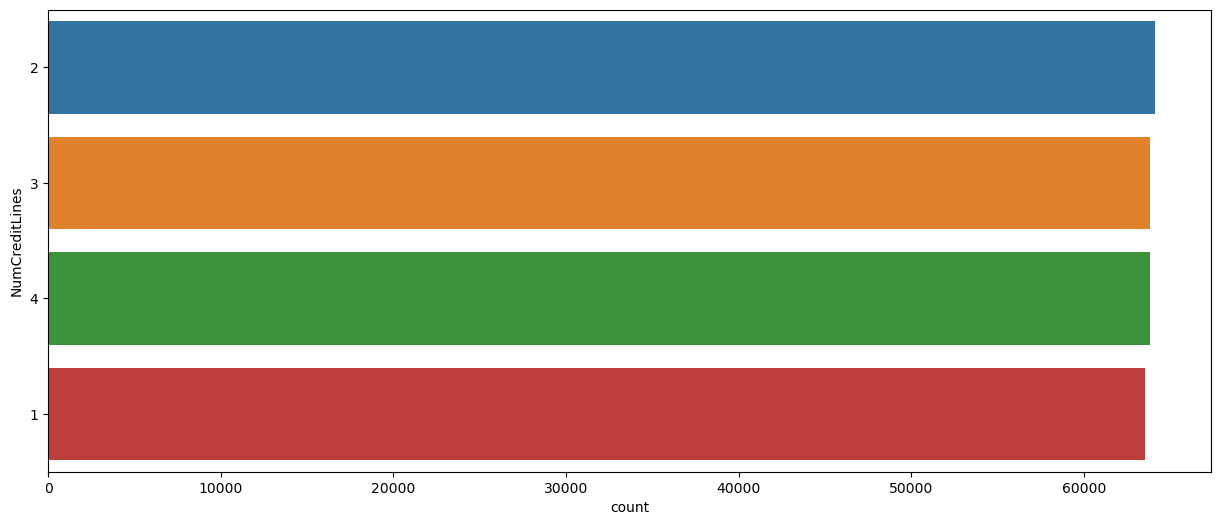

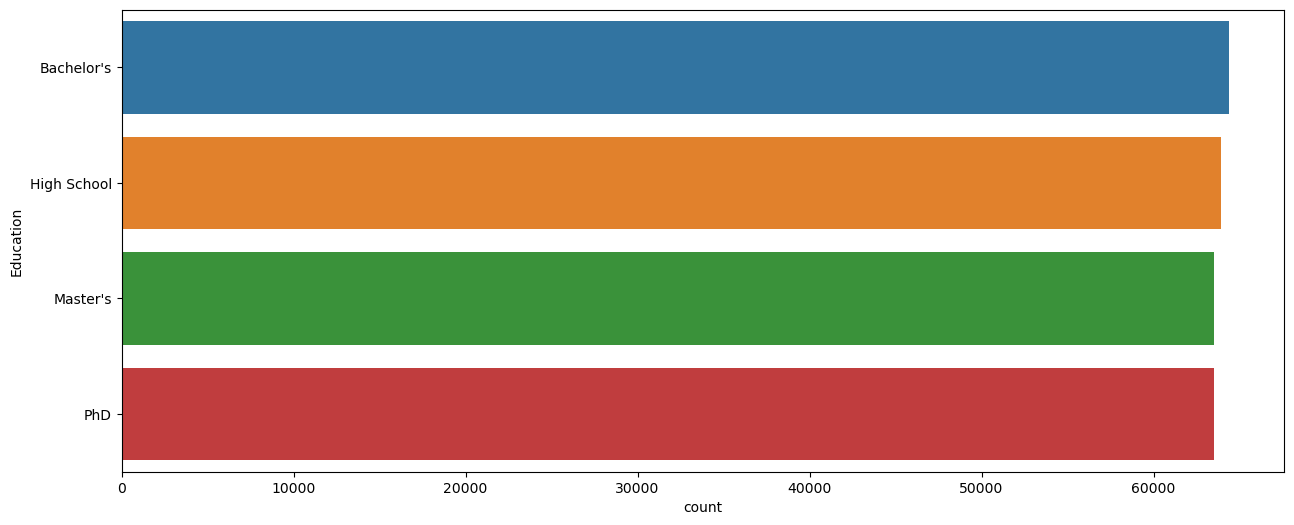

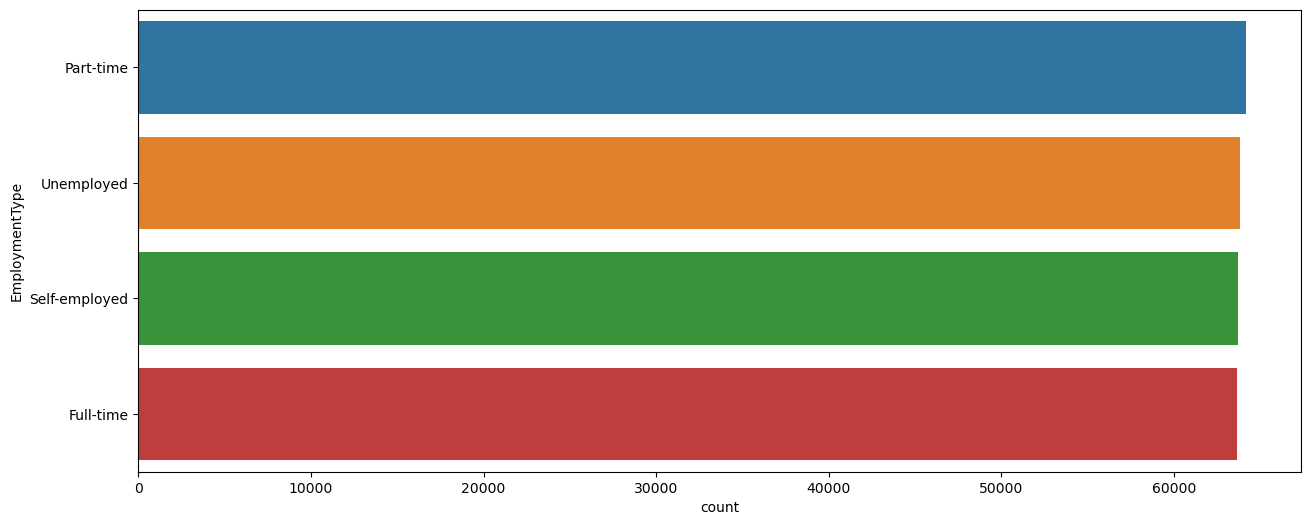

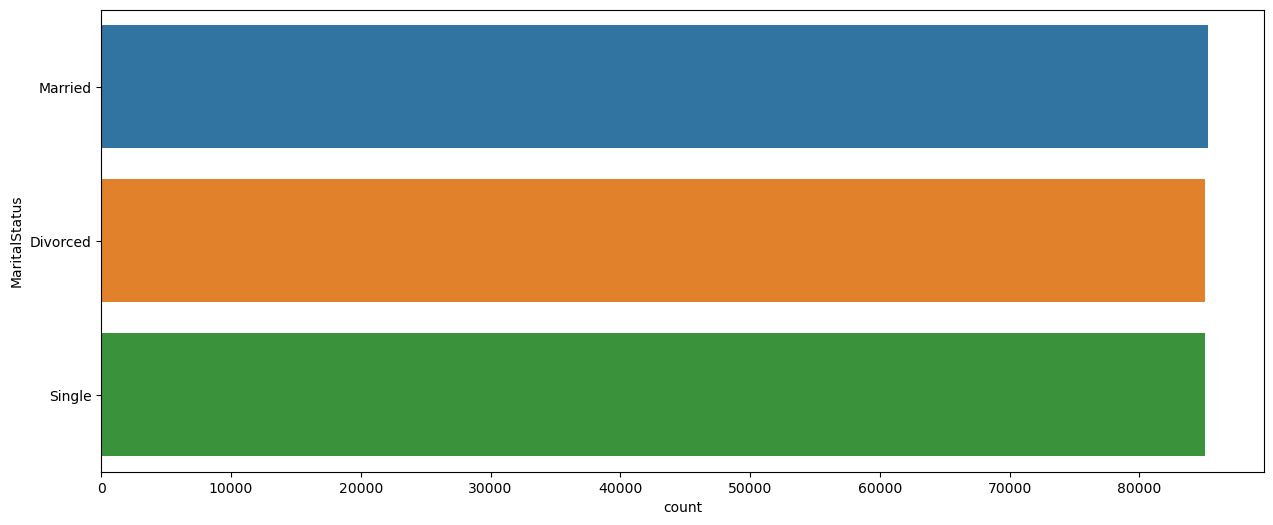

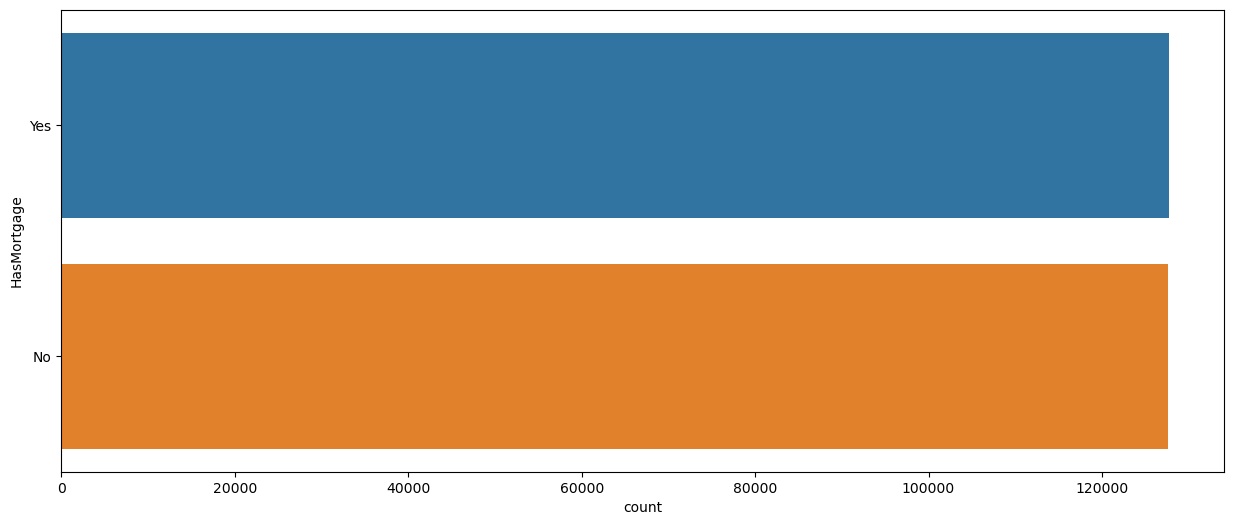

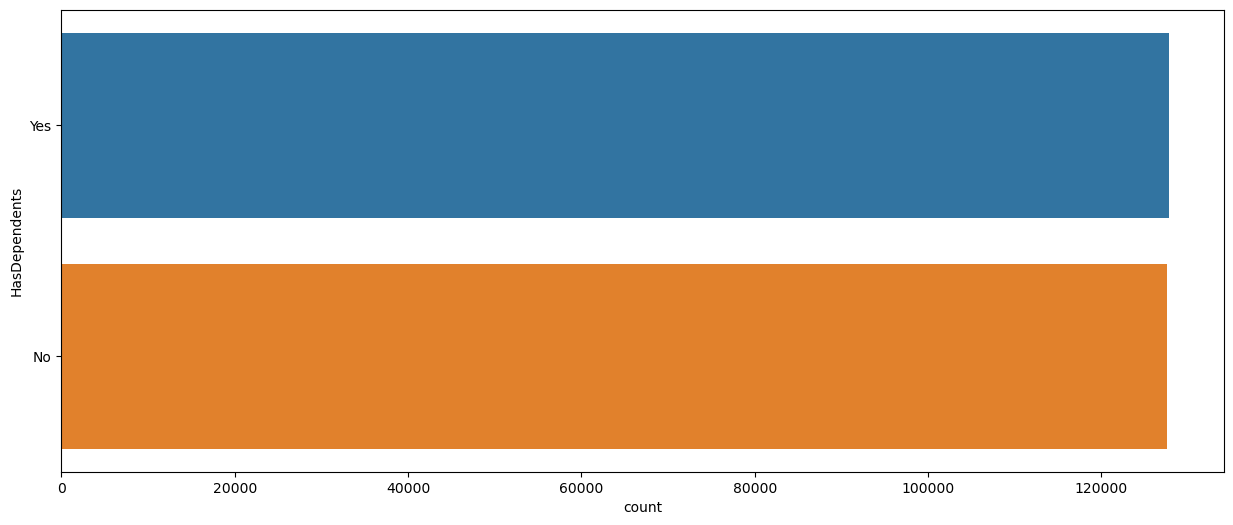

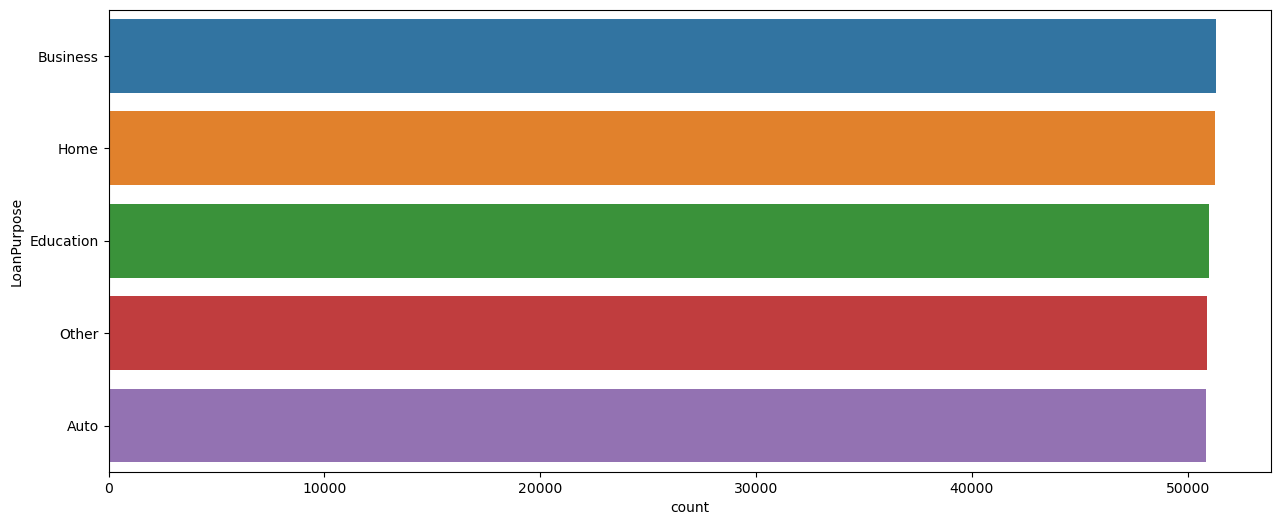

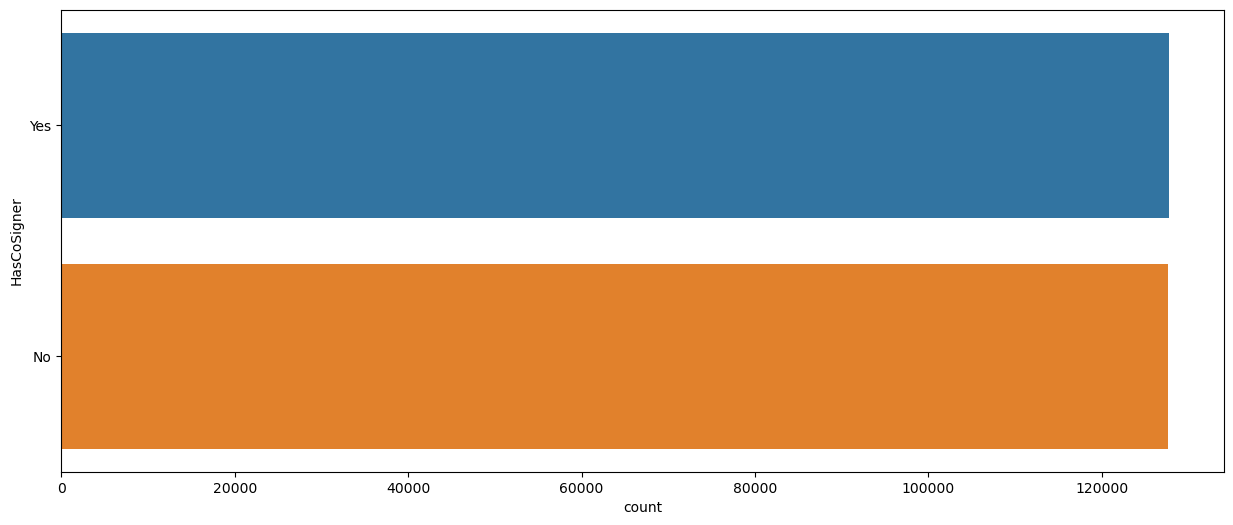

In [15]:
tables = ['NumCreditLines', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for i in tables:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.countplot(y = train_data[i][1:],data=train_data.iloc[1:], order=train_data[i][1:].value_counts().index)

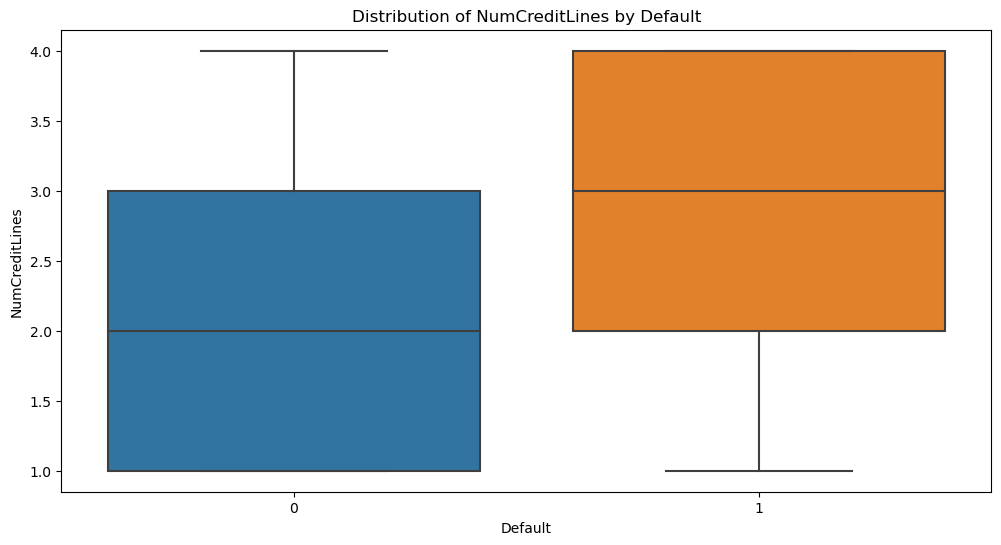

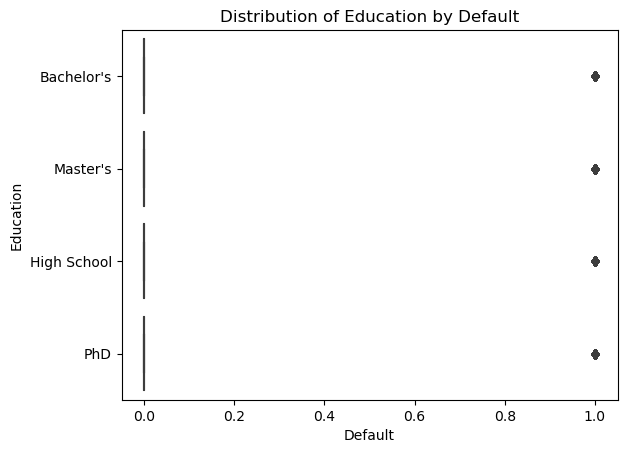

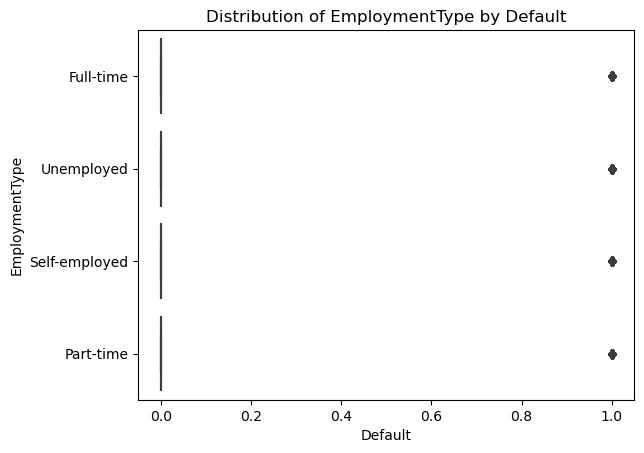

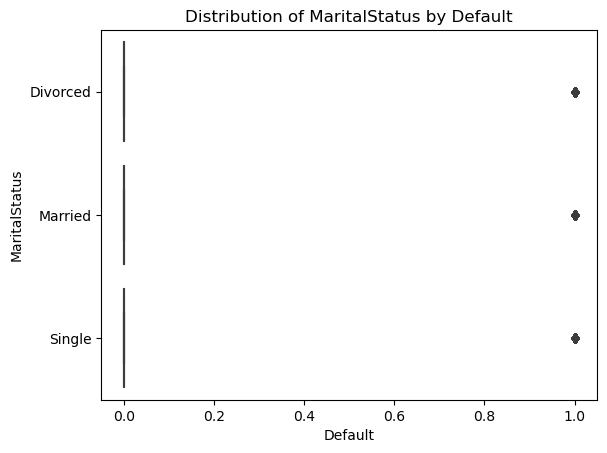

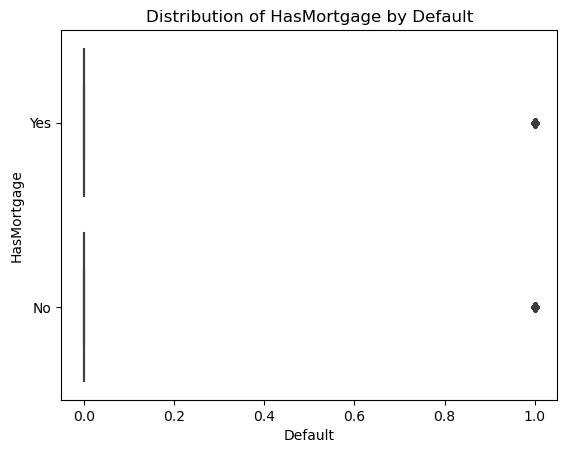

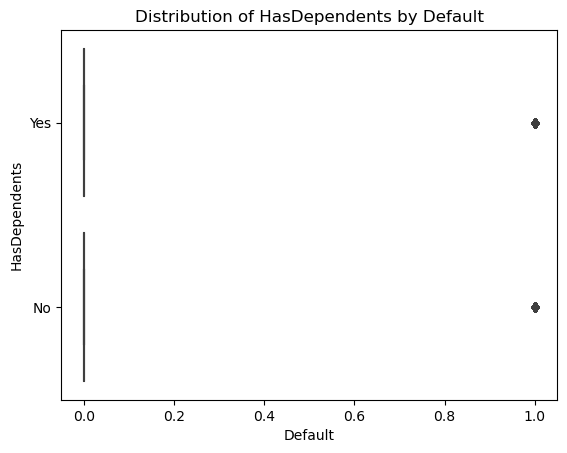

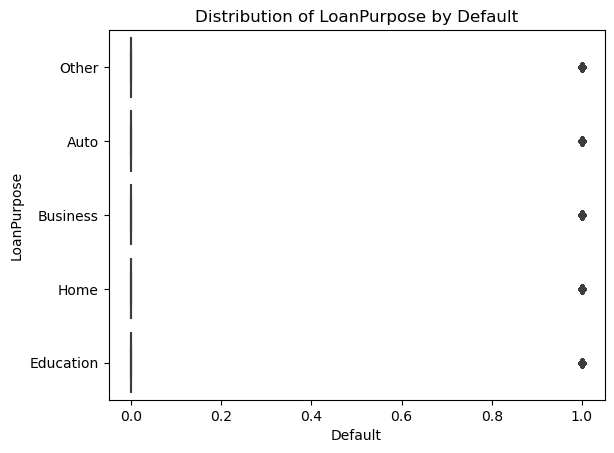

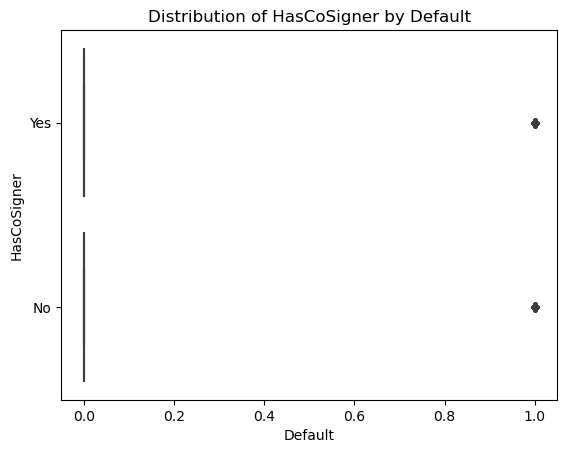

In [16]:
plt.figure(figsize=(12, 6))
for col in tables:
    sns.boxplot(x= train_data['Default'], y = col, data = train_data)
    plt.title(f'Distribution of {col} by Default')
    plt.show()

In [17]:
train_data.drop(columns=['LoanID'], axis = 1, inplace = True)

In [42]:
train_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


# 5. Model Building

In [43]:
x = train_data.drop(columns=['Default'])
y = train_data['Default']

In [44]:
x

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No


In [45]:
y

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [47]:
ohe = OneHotEncoder(drop='first', sparse=False)

In [48]:
x = ohe.fit_transform(x[['NumCreditLines', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']])

In [49]:
x.shape

(255347, 18)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [51]:
x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [97]:
x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [52]:
sc = StandardScaler()

In [53]:
x_train_scaled = sc.fit_transform(x_train)

In [54]:
x_train_scaled

array([[ 1.72507278, -0.57820645, -0.57585898, ..., -0.50124799,
        -0.4994941 , -1.00100306],
       [-0.57968569,  1.72948606, -0.57585898, ..., -0.50124799,
        -0.4994941 , -1.00100306],
       [ 1.72507278, -0.57820645, -0.57585898, ...,  1.99502046,
        -0.4994941 , -1.00100306],
       ...,
       [-0.57968569, -0.57820645, -0.57585898, ..., -0.50124799,
         2.00202565,  0.99899794],
       [-0.57968569, -0.57820645, -0.57585898, ..., -0.50124799,
        -0.4994941 , -1.00100306],
       [ 1.72507278, -0.57820645, -0.57585898, ..., -0.50124799,
         2.00202565,  0.99899794]])

In [55]:
x_test_scaled = sc.transform(x_test)

# Logistic Regression

In [56]:
lr = LogisticRegression()

In [57]:
par = {'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,10,15,20], 'max_iter':[100,200]}

In [58]:
gcv = GridSearchCV(lr, param_grid = par, cv = 5, scoring = 'accuracy')

In [59]:
gcv.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [60]:
pred_lr = gcv.predict(x_test_scaled)

In [61]:
score_lr = accuracy_score(y_test, pred_lr)

In [62]:
score_lr

0.882513275999812

# KNN

In [69]:
kn = KNeighborsClassifier()

In [64]:
kn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [65]:
pred_kn = kn.predict(x_test_scaled)

  File "C:\Users\RUPAK\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\RUPAK\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUPAK\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\RUPAK\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [66]:
score_kn = accuracy_score(y_test, pred_kn)

In [67]:
score_kn

0.8715321835299278

In [70]:
kn_new = KNeighborsClassifier(n_neighbors=3)

In [71]:
kn_new.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
pred_kn_new = kn_new.predict(x_test_scaled)

In [73]:
score_kn_new = accuracy_score(y_test, pred_kn_new)

In [74]:
score_kn_new

0.8550057176872347

In [77]:
kn_final = KNeighborsClassifier(n_neighbors=10)
kn_final.fit(x_train_scaled, y_train)
pred_kn_final = kn_final.predict(x_test_scaled)
score_kn_final = accuracy_score(y_test, pred_kn_final)
score_kn_final

0.8820589940003446

# Decision Tree 

In [78]:
dtc = DecisionTreeClassifier()

In [79]:
par_new = {'criterion' :['gini', 'entropy'], 'max_depth' : [1,2,3,5,6,7]}

In [80]:
gcv_dtc = GridSearchCV(dtc, param_grid = par_new, cv = 5, scoring = accuracy_score)

In [81]:
gcv_dtc.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 6, 7]},
             scoring=<function accuracy_score at 0x0000021A462FC220>)

In [82]:
pred_dtc = gcv_dtc.predict(x_test_scaled)

In [83]:
score_dtc = accuracy_score(y_test, pred_dtc)

In [84]:
score_dtc

0.882513275999812

# Random Forest

In [86]:
rfc = RandomForestClassifier()

In [87]:
gcv_rfc = GridSearchCV(rfc, param_grid = par_new, cv = 5)

In [88]:
gcv_rfc.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 6, 7]})

In [89]:
pred_rfc = gcv_rfc.predict(x_test)

In [90]:
score_rfc = accuracy_score(y_test, pred_rfc)

In [91]:
score_rfc

0.882513275999812

In [108]:
tab = {'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'RandomForest'], 'Score': ['88.25%', '88.25%', '88.20%', '88.25%']}
summary = pd.DataFrame(tab)

In [109]:
summary

,Model,Score
0,Logistic Regression,88.25%
1,Decision Tree,88.25%
2,KNN,88.20%
3,RandomForest,88.25%


# 6. Creating Final Testing on test data and generating output file

In [92]:
test_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109430,V12FM6UKMS,67,76970,108110,404,67,3,10.51,36,0.18,PhD,Self-employed,Married,Yes,Yes,Auto,No
109431,GLRB9P0CQO,44,108272,238508,335,28,1,9.65,24,0.32,PhD,Full-time,Divorced,Yes,Yes,Education,No
109432,RWCJ3SL2J6,54,73526,18513,576,75,2,17.22,36,0.62,Master's,Part-time,Divorced,No,Yes,Education,No
109433,2Z9IZS4OMY,60,75296,38414,369,71,4,17.69,36,0.66,PhD,Part-time,Married,No,No,Business,Yes


In [93]:
test_data.drop(columns=['LoanID'], axis = 1, inplace=True)

In [94]:
test_data = ohe.fit_transform(test_data[['NumCreditLines', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']])

In [95]:
test_data

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [96]:
test_data.shape

(109435, 18)

In [98]:
test_data = sc.transform(test_data)

In [99]:
test_data

array([[ 1.72507278, -0.57820645, -0.57585898, ..., -0.50124799,
         2.00202565, -1.00100306],
       [ 1.72507278, -0.57820645, -0.57585898, ..., -0.50124799,
        -0.4994941 ,  0.99899794],
       [-0.57968569,  1.72948606, -0.57585898, ..., -0.50124799,
         2.00202565,  0.99899794],
       ...,
       [ 1.72507278, -0.57820645, -0.57585898, ..., -0.50124799,
        -0.4994941 , -1.00100306],
       [-0.57968569, -0.57820645,  1.73653625, ..., -0.50124799,
        -0.4994941 ,  0.99899794],
       [-0.57968569, -0.57820645,  1.73653625, ..., -0.50124799,
        -0.4994941 ,  0.99899794]])

In [100]:
final_pred = gcv_rfc.predict(test_data)

In [101]:
final_pred.shape

(109435,)

In [102]:
result = pd.DataFrame()

In [104]:
result['LoanID'] = test_copy['LoanID']
result['predicted_probability'] = final_pred

In [105]:
result

,LoanID,predicted_probability
0,7RYZGMKJIR,0
1,JDL5RH07AM,0
2,STAL716Y79,0
3,SO0KKJ3IQB,0
4,T99CWTYDCP,0
...,...,...
109430,V12FM6UKMS,0
109431,GLRB9P0CQO,0
109432,RWCJ3SL2J6,0
109433,2Z9IZS4OMY,0


In [106]:
result.to_csv('submission_file.csv', index = False)

# Feedback is appreciated, Thanks.